Wielkość zbioru X Train:  (2279, 115, 1)
Wielkość zbioru X Test:  (295, 115, 1)
Wielkość zbioru X Validation:  (294, 115, 1)
Wielkość zbioru Y Train:  (2279, 6)
Wielkość zbioru Y Test:  (295, 6)
Wielkość zbioru Y Validation:  (294, 6)
10/10 [==============================] - 0s 5ms/step
Classification Report from Best Model:
               precision    recall  f1-score   support

  schodzenie       0.91      0.87      0.89        23
  odpoczynek       1.00      1.00      1.00       102
   przysiady       1.00      1.00      1.00        38
      stanie       1.00      1.00      1.00        35
  wchodzenie       0.83      0.83      0.83        12
   chodzenie       0.99      1.00      0.99        85

    accuracy                           0.98       295
   macro avg       0.96      0.95      0.95       295
weighted avg       0.98      0.98      0.98       295



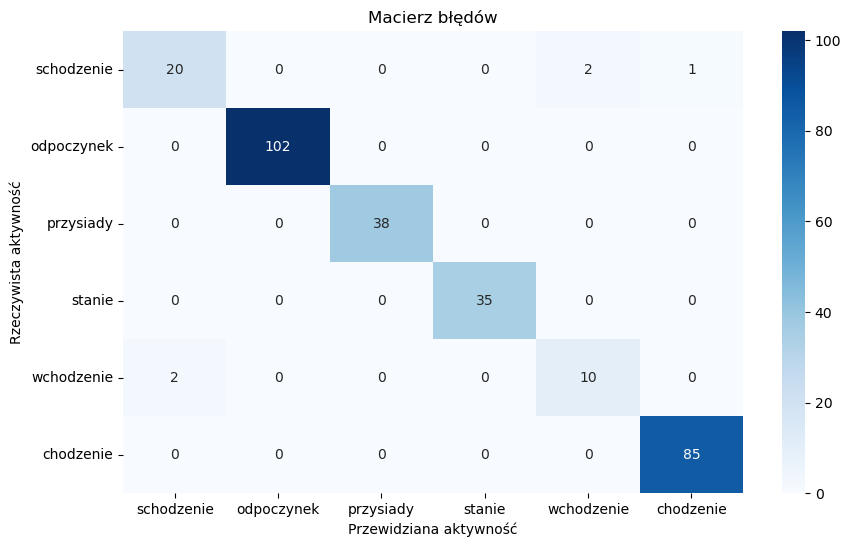

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')

data = pd.read_csv('fifth-run/feats_version_5_22_acc.csv')
data = data[~data["activity"].str.contains("jogging")]
data["activity"] = data["activity"].replace(["sitting", "lying"], "resting")
data = data.reset_index(drop=True)
result = data[data["name"].str.contains("kuba")]
result_train = data[data["name"].str.contains("kuba") == False]
result_train.drop('name', axis=1, inplace=True)
result.drop('name', axis=1, inplace=True)
X_train = result_train.iloc[:, :-1].values
labels_train = result_train.iloc[:, -1].values
X_test = result.iloc[:, :-1].values
labels_test = result.iloc[:, -1].values


encoder = LabelBinarizer()
labels_train1 = encoder.fit_transform(labels_train)
labels_test1 = encoder.transform(labels_test)
X_val, X_test, labels_val1, labels_test1 = train_test_split(X_test, labels_test1, test_size=0.5, random_state=42)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = np.array(X_val).reshape(X_val.shape[0], X_val.shape[1], 1)
print("Wielkość zbioru X Train: ", X_train.shape)
print("Wielkość zbioru X Test: ", X_test.shape)
print("Wielkość zbioru X Validation: ", X_val.shape)
print("Wielkość zbioru Y Train: ", labels_train1.shape)
print("Wielkość zbioru Y Test: ", labels_test1.shape)
print("Wielkość zbioru Y Validation: ", labels_val1.shape)

best_model = tf.keras.models.load_model('best_model2.h5')
class_mapping = {
    0: "schodzenie",  # Replace with your actual class name or label
    1: "odpoczynek",
    2: "przysiady",
    3: "stanie",
    4: "wchodzenie",
    5:  "chodzenie" }

listt =[]
for key in class_mapping.values():
    listt.append(key)

y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
labels_test_categorical = np.argmax(labels_test1, axis=1)
classification_rep = classification_report(labels_test_categorical, y_pred_classes, target_names=listt)
print("Classification Report from Best Model:\n", classification_rep)

confusion_mtx = confusion_matrix(labels_test_categorical, y_pred_classes)
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=listt, yticklabels=listt)
plt.xlabel('Przewidziana aktywność')
plt.ylabel('Rzeczywista aktywność')
plt.title('Macierz błędów')
plt.show()